<a href="https://colab.research.google.com/github/Desaleigh/DATA110-FALL2025/blob/main/Week5%266_Assignment_Desaleigh_Mazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install joypy

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from joypy import joyplot

In [3]:
titanic = sns.load_dataset('titanic')

#Week 5 and 6 Assignment — Titanic Distributions

## 1) Understand the Data

In [19]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


**Task 1 — Dataset overview (5–6 sentences)**
Identify the variables you will use (survived, pclass, sex, age, fare, embark_town, sibsp, parch). briefly explain why these columns matter for your analysis.

This dataset contains information about passengers from the RMS Titanic disaster. Variables like sex, age, and pclass allows us to understand the demographics of the passengers. These variables can suggest the probability of survival. Variables like sibps (number of siblings/spouses aboard) and parch (number of parents/children aboard) provides insights to the passengers and help us understand typical family sizes that boarded the Titanic. The variable fare (price of the fare) is often correlated to pclass. In addition, Embarked (port of embarkation) which includes 3 locations (C = Cherbourg, Q = Queenstown, S = Southampton) is important for understanding demographic and predicting survival.

## 2) Fare & Survival (Week 5 core)

**Task 2 — Fare distribution (histogram + KDE)**
Create a histogram and a KDE of fare. Discuss right-skew, outliers, and a socioeconomic interpretation.

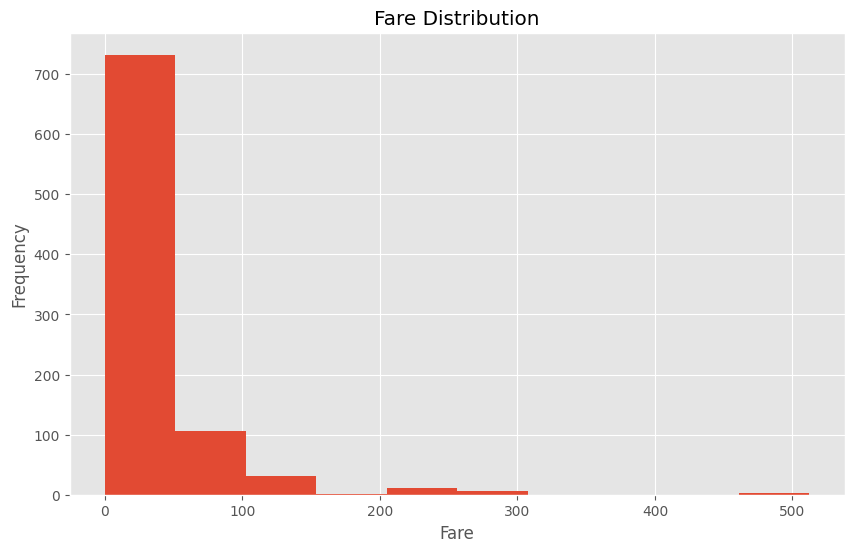

In [5]:
#Histogram
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.hist(titanic['fare'])
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution')
plt.show()

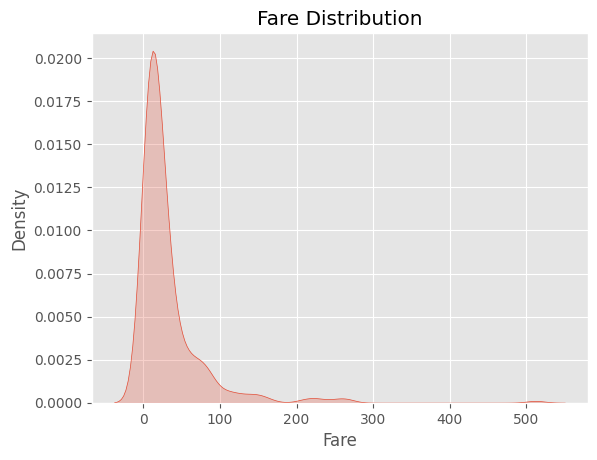

In [7]:
#KDE

sns.kdeplot(titanic['fare'], fill=True)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Fare Distribution')
plt.show()

The Fare Distribution has a right skew and seems to have an outlier closer to a high fare of 500 British Pounds. Most passengers paid fares between 0 to 100 which can suggest the demographic to be predominantly third class on Titanic, while there was a smaller demigraphic of first class.

**Task 3 — Fare × Survival (distribution comparison)**
Compare fare distributions for survived = 0 vs 1 (e.g., overlaid KDEs). Focus your interpretation on distribution shapes, not just means.

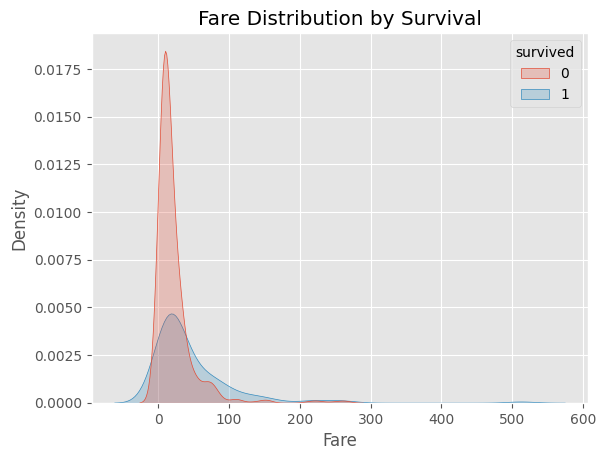

In [8]:
sns.kdeplot(data=titanic, x='fare', hue='survived', fill=True)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Fare Distribution by Survival')
plt.show()

The Fare Distribution by Survival suggests that majority of the passengers who paid lower fares (0-100) did not survive and passengers who paid higher fares had a better survival chance.

# 3) Week 6 Add-ons (3 plots)

**Task 4 — Boxplot across multiple groups (fare)**
Make a boxplot of fare grouped by pclass, with an additional split by sex. Interpret what differs across groups.

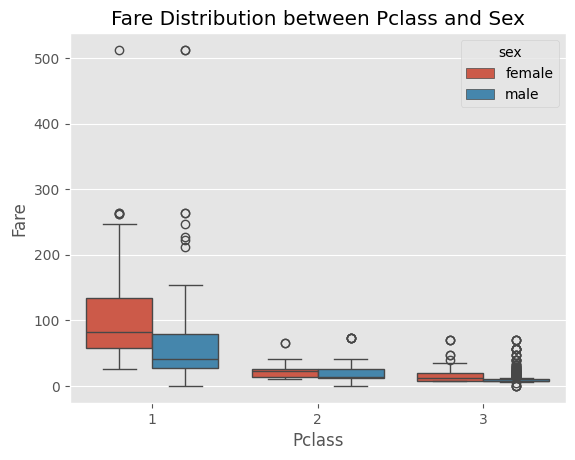

In [9]:
sns.boxplot(x='pclass', y='fare', hue='sex', data=titanic)
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Fare Distribution between Pclass and Sex')
plt.show()

The average fare for a woman in 1st class was higher than the average fare for a man in 1st class. For 2nd class, men and women seem to have the same maximum fare value. The fare values declined the class increases, so women and men in 3rd class paid the lowest fares compared to the other classes.

**Task 5 — Violin (age by sex)**
Create a violin plot of age by sex. State any meaningful differences and what they suggest.

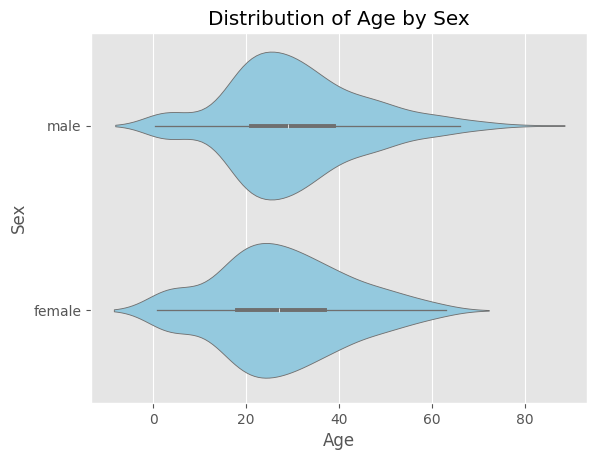

In [11]:
# Violin plot
sns.violinplot(x='age', y='sex', data= titanic, color="skyblue")

# Customizing the plot
plt.title('Distribution of Age by Sex')
plt.xlabel('Age')
plt.ylabel('Sex')

plt.show()


The average female passenger's age is just below their 30s. The average male passenger's age is around or slightly above the age of 30. This plot suggests there were more older men than women on Titanic.

**Task 6 — Strip (detail on top of violin or boxplot)**
Overlay individual observations to expose clusters and outliers. Explain what becomes visible with points that’s not obvious from the aggregate shape alone.

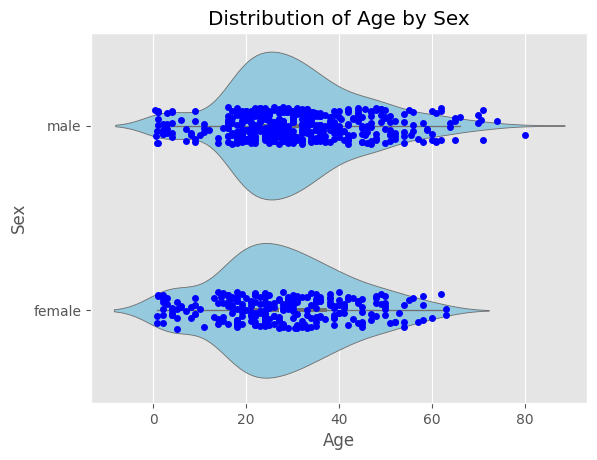

In [15]:
sns.violinplot(x='age', y='sex', data=titanic, color="skyblue")

# Overlay Strip plot
sns.stripplot(x='age', y='sex', data=titanic, color="blue")

plt.title('Distribution of Age by Sex')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.show()

The strip plot allows me to visualize the distribution of individual numbers of age by sex. For men, it seems the scatter points are more clustered between the age 20-40. The same goes for women except it is slightly more sparsed.